In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
from sklearn.cluster import KMeans, k_means #For clustering
from sklearn.decomposition import PCA #Linear Dimensionality reduction.

In [38]:
df = pd.read_csv("sales_data_sample.csv",encoding='ISO-8859-1') #Loading the dataset.

In [39]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [40]:
df.shape

(2823, 25)

In [41]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [43]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [44]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [45]:
df_drop = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATUS','POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
df = df.drop(df_drop, axis=1) #Dropping the categorical uneccessary columns along with columns having null values. Can't fill the null values are there are alot of null values

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   QTR_ID           2823 non-null   int64  
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   PRODUCTLINE      2823 non-null   object 
 9   MSRP             2823 non-null   int64  
 10  PRODUCTCODE      2823 non-null   object 
 11  COUNTRY          2823 non-null   object 
 12  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 286.8+ KB


In [47]:
df.dtypes

QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
ORDERDATE           object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
COUNTRY             object
DEALSIZE            object
dtype: object

In [48]:
df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [49]:
df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [50]:
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [51]:
 df['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [52]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,5/7/2003 0:00,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,7/1/2003 0:00,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,10/10/2003 0:00,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [53]:
productline = pd.get_dummies(df['PRODUCTLINE']) #Converting the categorical columns.
Dealsize = pd.get_dummies(df['DEALSIZE'])

In [55]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,5/7/2003 0:00,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,7/1/2003 0:00,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,10/10/2003 0:00,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [56]:
df = pd.concat([df,productline,Dealsize], axis = 1)

In [57]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,95,...,False,True,False,False,False,False,False,False,False,True
1,34,81.35,5,2765.90,5/7/2003 0:00,2,5,2003,Motorcycles,95,...,False,True,False,False,False,False,False,False,False,True
2,41,94.74,2,3884.34,7/1/2003 0:00,3,7,2003,Motorcycles,95,...,False,True,False,False,False,False,False,False,True,False
3,45,83.26,6,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,95,...,False,True,False,False,False,False,False,False,True,False
4,49,100.00,14,5205.27,10/10/2003 0:00,4,10,2003,Motorcycles,95,...,False,True,False,False,False,False,False,False,True,False


In [58]:
df_drop = ['COUNTRY','PRODUCTLINE','DEALSIZE'] #Dropping Country too as there are alot of countries.
df = df.drop(df_drop, axis=1)

In [59]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2/24/2003 0:00,1,2,2003,95,S10_1678,False,True,False,False,False,False,False,False,False,True
1,34,81.35,5,2765.90,5/7/2003 0:00,2,5,2003,95,S10_1678,False,True,False,False,False,False,False,False,False,True
2,41,94.74,2,3884.34,7/1/2003 0:00,3,7,2003,95,S10_1678,False,True,False,False,False,False,False,False,True,False
3,45,83.26,6,3746.70,8/25/2003 0:00,3,8,2003,95,S10_1678,False,True,False,False,False,False,False,False,True,False
4,49,100.00,14,5205.27,10/10/2003 0:00,4,10,2003,95,S10_1678,False,True,False,False,False,False,False,False,True,False


In [60]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes 

In [61]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2/24/2003 0:00,1,2,2003,95,0,False,True,False,False,False,False,False,False,False,True
1,34,81.35,5,2765.90,5/7/2003 0:00,2,5,2003,95,0,False,True,False,False,False,False,False,False,False,True
2,41,94.74,2,3884.34,7/1/2003 0:00,3,7,2003,95,0,False,True,False,False,False,False,False,False,True,False
3,45,83.26,6,3746.70,8/25/2003 0:00,3,8,2003,95,0,False,True,False,False,False,False,False,False,True,False
4,49,100.00,14,5205.27,10/10/2003 0:00,4,10,2003,95,0,False,True,False,False,False,False,False,False,True,False


In [62]:
df.drop('ORDERDATE', axis=1, inplace=True) 

In [63]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,1,2,2003,95,0,False,True,False,False,False,False,False,False,False,True
1,34,81.35,5,2765.90,2,5,2003,95,0,False,True,False,False,False,False,False,False,False,True
2,41,94.74,2,3884.34,3,7,2003,95,0,False,True,False,False,False,False,False,False,True,False
3,45,83.26,6,3746.70,3,8,2003,95,0,False,True,False,False,False,False,False,False,True,False
4,49,100.00,14,5205.27,4,10,2003,95,0,False,True,False,False,False,False,False,False,True,False


In [65]:
df.dtypes

QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
MSRP                  int64
PRODUCTCODE            int8
Classic Cars           bool
Motorcycles            bool
Planes                 bool
Ships                  bool
Trains                 bool
Trucks and Buses       bool
Vintage Cars           bool
Large                  bool
Medium                 bool
Small                  bool
dtype: object

In [66]:
distortions = [] # Within Cluster Sum of Squares from the centroid
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_) 

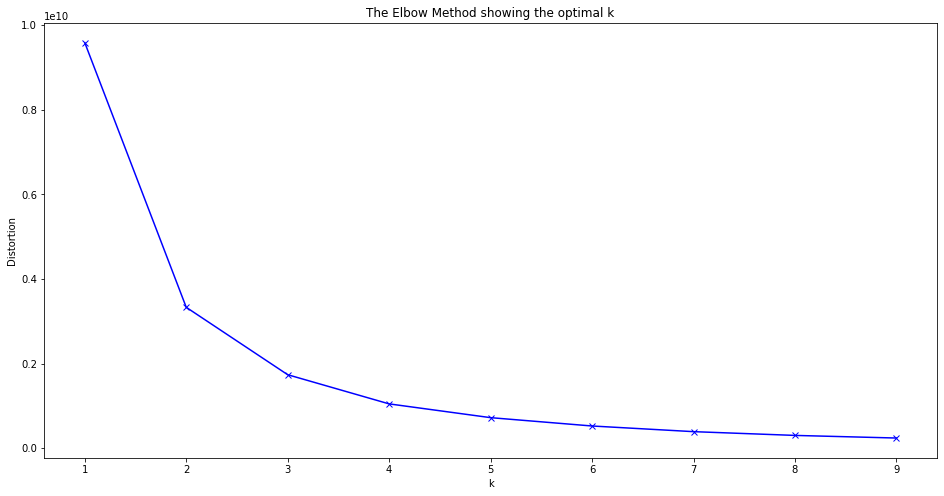

In [69]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [70]:
X_train = df.values

In [71]:
X_train.shape

(2823, 19)

In [72]:
model = KMeans(n_clusters=3,random_state=2) #Number of cluster = 3
model = model.fit(X_train) #Fitting the values to create a model.
predictions = model.predict(X_train) #Predicting the cluster values (0,1,or 2)

In [73]:
unique,counts = np.unique(predictions,return_counts=True)

In [74]:
counts = counts.reshape(1,3)

In [75]:
counts_df = pd.DataFrame(counts,columns=['Cluster1','Cluster2','Cluster3'])

In [76]:
counts_df.head()

,Cluster1,Cluster2,Cluster3
0,1344,398,1081


In [78]:
pca = PCA(n_components=2) #Converting all the features into 2 columns to make it easy to visualize using Principal Component Analysis.

In [79]:
reduced_X = pd.DataFrame(pca.fit_transform(X_train),columns=['PCA1','PCA2']) #Creating a DataFrame.

In [80]:
reduced_X.head()

,PCA1,PCA2
0,-682.488323,-42.819535
1,-787.665502,-41.694991
2,330.732170,-26.481208
3,193.040232,-26.285766
4,1651.532874,-6.891196


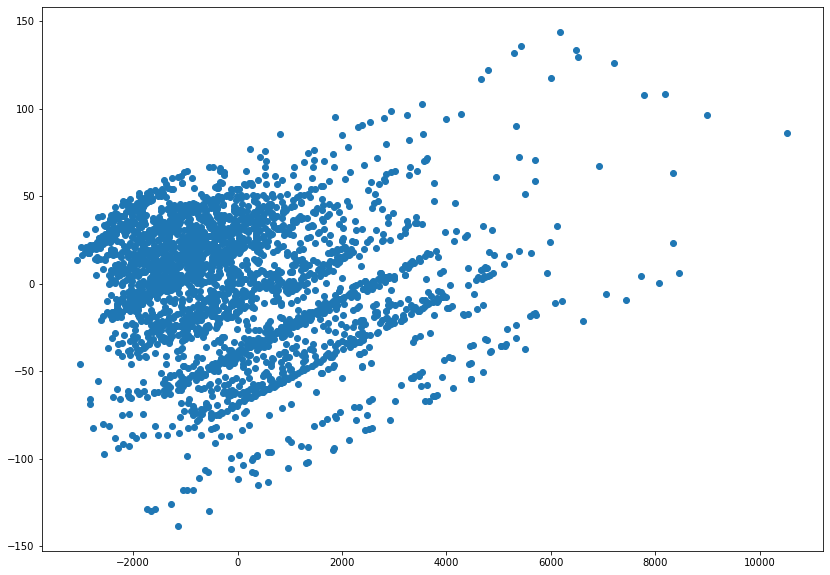

In [81]:
#Plotting the normal Scatter Plot
plt.figure(figsize=(14,10))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'])

In [83]:
model.cluster_centers_ #Finding the centriods. (3 Centriods in total. Each Array contains a centroids for particularfeature )

array([[ 3.07723214e+01,  6.97585491e+01,  6.65178571e+00,
         2.10716933e+03,  2.71354167e+00,  7.08184524e+00,
         2.00381696e+03,  7.81674107e+01,  6.25811012e+01,
         2.62648810e-01,  1.21279762e-01,  1.28720238e-01,
         1.01190476e-01,  3.79464286e-02,  9.30059524e-02,
         2.55208333e-01,  2.08166817e-17,  4.61309524e-02,
         9.53869048e-01],
       [ 4.44623116e+01,  9.98998241e+01,  5.77135678e+00,
         7.00029073e+03,  2.70100503e+00,  7.03015075e+00,
         2.00387688e+03,  1.44356784e+02,  3.23869347e+01,
         5.35175879e-01,  1.03015075e-01,  7.03517588e-02,
         2.01005025e-02,  1.25628141e-02,  1.28140704e-01,
         1.30653266e-01,  3.94472362e-01,  6.05527638e-01,
         1.11022302e-16],
       [ 3.70148011e+01,  9.49606383e+01,  6.49121184e+00,
         4.08369802e+03,  2.72895467e+00,  7.12858464e+00,
         2.00379001e+03,  1.12681776e+02,  5.06965772e+01,
         3.70952821e-01,  1.17483811e-01,  9.71322849e-02,
    

In [84]:
reduced_centers = pca.transform(model.cluster_centers_) #Transforming the centroids into 3 in x and y coordinate

In [85]:
reduced_centers

array([[-1.44698921e+03,  2.68456273e+00],
       [ 3.44678179e+03,  3.38057613e+00],
       [ 5.30004017e+02, -4.58235116e+00]])

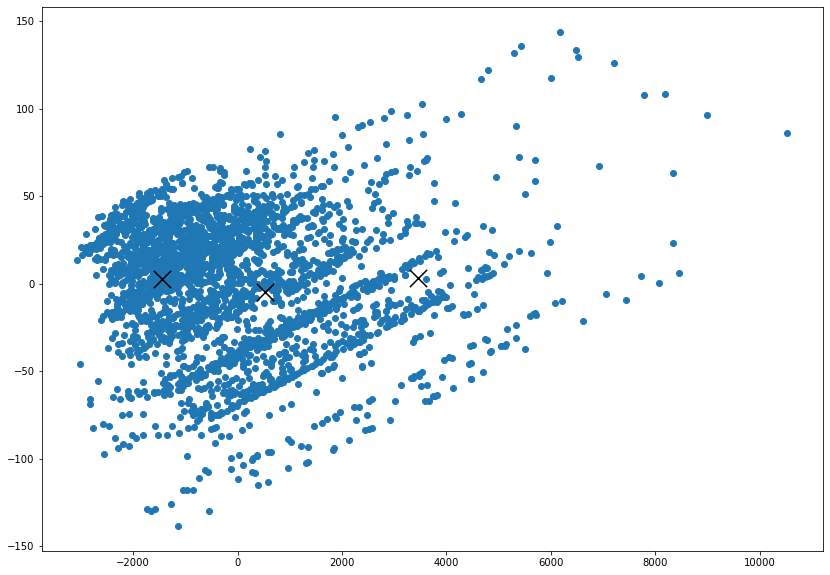

In [86]:
plt.figure(figsize=(14,10))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'])
plt.scatter(reduced_centers[:,0],reduced_centers[:,1],color='black',marker='x',s=300) #Plotting the centriods

In [87]:
reduced_X['Clusters'] = predictions 

In [88]:
reduced_X.head()

,PCA1,PCA2,Clusters
0,-682.488323,-42.819535,0
1,-787.665502,-41.694991,0
2,330.732170,-26.481208,2
3,193.040232,-26.285766,2
4,1651.532874,-6.891196,2


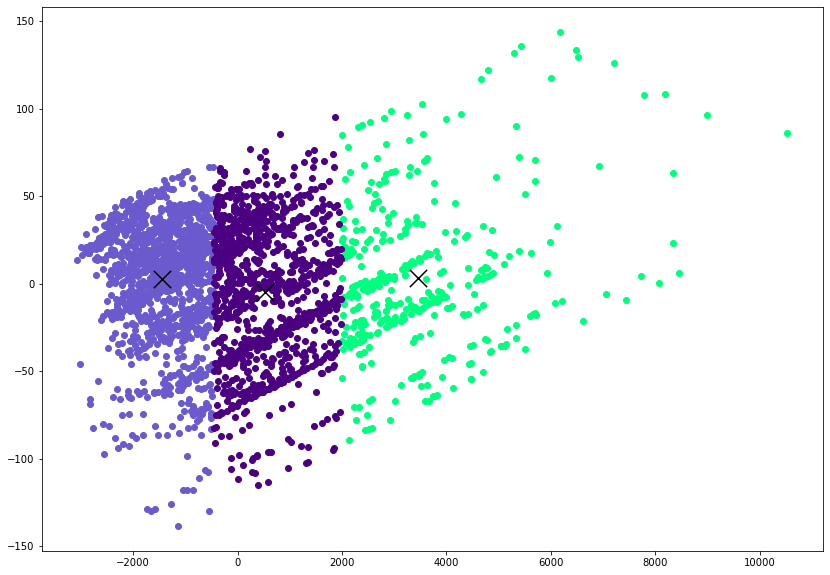

In [90]:
#Plotting the clusters
plt.figure(figsize=(14,10))
# taking the cluster number and first column taking the same cluster number and second column Assigning the color
plt.scatter(reduced_X[reduced_X['Clusters'] == 0].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 0].loc[:,'PCA2'],
color='slateblue')
plt.scatter(reduced_X[reduced_X['Clusters'] == 1].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 1].loc[:,'PCA2'],
color='springgreen')
plt.scatter(reduced_X[reduced_X['Clusters'] == 2].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 2].loc[:,'PCA2'],
color='indigo')
plt.scatter(reduced_centers[:,0],reduced_centers[:,1],color='black',marker='x',s=300)